<a href="https://colab.research.google.com/github/Severina7/cognizant_ai/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 - Exploratory Data Analysis

This notebook will walk you through this task interactively, meaning that once you've imported this notebook into `Google Colab`, you'll be able to run individual cells of code independantly, and see the results as you go.

This notebooks is designed for users that have an understanding of Python and data analysis. There will be some helper functions and initial setup code provided, but it will be up to you to perform the analysis and to draw insights!

---

## Section 1 - Setup

First, we need to mount this notebook to our Google Drive folder, in order to access the CSV data file. If you haven't already, watch this video https://www.youtube.com/watch?v=woHxvbBLarQ to help you mount your Google Drive folder.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In order to view, analyse and manipulate the dataset, we must load it into something called a `dataframe`, which is a way of storing tabulated data in a virtual table. This dataframe will allow us to analyse the data freely. To load it into a dataframe, we will need a package called `Pandas`. We can install pandas with this command:

In [2]:
# !pip install pandas

And now we can import this package like so:

In [3]:
import pandas as pd

---

## Section 2 - Data loading

Now that Google Drive is mounted, you can store the CSV file anywhere in your Drive and update the `path` variable below to access it within this notebook. Once we've updated the `path`, let's read this CSV file into a pandas dataframe and see what it looks like

In [4]:
# Ignoring warning messages about deprecation and such from python
import warnings
warnings.filterwarnings('ignore')

path = '/content/drive/MyDrive/cognizant_ds_eda/sample_sales_data.csv'
df = pd.read_csv(path)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


Using the `.head()` method allows us to see the top 5 (5 by default) rows within the dataframe. We can use `.tail()` to see the bottom 5. If you want to see more than 5 rows, simply enter a number into the parentheses, e.g. `head(10)` or `tail(10)`.

---

## Section 3 - Descriptive statistics

In this section, you should try to gain a description of the data, that is: what columns are present, how many null values exist and what data types exists within each column.

To get you started an explanation of what the column names mean are provided below:

- transaction_id = this is a unique ID that is assigned to each transaction
- timestamp = this is the datetime at which the transaction was made
- product_id = this is an ID that is assigned to the product that was sold. Each product has a unique ID
- category = this is the category that the product is contained within
- customer_type = this is the type of customer that made the transaction
- unit_price = the price that 1 unit of this item sells for
- quantity = the number of units sold for this product within this transaction
- total = the total amount payable by the customer
- payment_type = the payment method used by the customer

After this, you should try to compute some descriptive statistics of the numerical columns within the dataset, such as:

- mean
- median
- count
- etc...

In [5]:
# Helper functions to do an initial display of values in the data
# as well as an initial univariate observation of the data

def get_info_and_stats(df):
    '''
    get_info_stats takes a DataFrame and returns information
    about the content of the DataFrame, the number of null
    values and a statistical description of the numerical
    columns of the DataFrame
    '''
    print(df.info(), df.isna().mean(), df.describe(), sep='\n#############################################\n')

def multi_frequency(df,vars):
    '''
    multi_frequency takes a dataframe and a list of columns,
    return a dataframe with the count and the frequency of the missing data
    '''
    frequency=df[vars].isnull().sum()
    percentage=df[vars].isnull().sum()*100/(len(df))
    df=pd.concat([frequency,percentage], axis=1, keys=['num_rows_missing', 'pct_rows_missing'])
    return df

def cat_value_counts(df):
    '''
    value_counts prints the count and percentage of columns.
    It uses list comprehensions to select the type of column to use
    '''
    cat_columns = df.columns[[df[col].dtypes == 'object' for col in df.columns]]
    for col in cat_columns:
        print(df[col].value_counts())
        print(df[col].value_counts(normalize=True, dropna=False))
        print('\n#############################################\n')

def num_value_counts(df):
    '''
    value_counts prints the count and percentage of columns.
    It uses list comprehensions to select the type of column to use
    '''
    num_columns = df.columns[[df[col].dtypes == 'int' or df[col].dtypes == 'float' for col in df.columns]]
    for col in num_columns:
        print(df[col].value_counts())
        print(df[col].value_counts(normalize=True, dropna=False))
        print('\n#############################################\n')

In [6]:
# Function for general information and stats
get_info_and_stats(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB
None
#############################################
transaction_id    0.0
timestamp         0.0
product_id        0.0
category          0.0
customer_type     0.0
unit_price        0.0
quantity          0.0
total             0.0
payment_type      0.0
dtype: float64
#############################################
        unit_price     qu

In [7]:
df.columns

Index(['transaction_id', 'timestamp', 'product_id', 'category',
       'customer_type', 'unit_price', 'quantity', 'total', 'payment_type'],
      dtype='object')

In [8]:
# Creating the set of columns to use in the function then running the function
columns = ['transaction_id', 'timestamp', 'product_id', 'category',\
       'customer_type', 'unit_price', 'quantity', 'total', 'payment_type']
multi_frequency(df,columns)

,num_rows_missing,pct_rows_missing
transaction_id,0,0.0
timestamp,0,0.0
product_id,0,0.0
category,0,0.0
customer_type,0,0.0
unit_price,0,0.0
quantity,0,0.0
total,0,0.0
payment_type,0,0.0


*The two pieces of code below are helping have a visual of the data for the duplicated timestamps. A visual is useful to detect patterns even if it is not a chart.*

In [9]:
df[df['timestamp'] == '2022-03-02 19:32:20']

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
1009,2e0c396d-a9f0-40b6-94b4-b9b21ed91dbb,2022-03-02 19:32:20,abc7ecb4-9cbf-4276-8d2d-7bdac2ae5e9f,vegetables,standard,4.99,3,14.97,credit card
6510,c3b44c3b-71c7-4608-88f4-e36eeb6fc91f,2022-03-02 19:32:20,6e8ccbee-64de-4ef7-b63b-ff72818cb29b,baby products,gold,12.49,1,12.49,e-wallet


In [10]:
duplicate_timestamps = df[df.duplicated('timestamp', keep=False)]
duplicate_timestamps.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
17,1b5dcfd7-9e27-4fee-91af-95845d4d8ae6,2022-03-05 09:44:16,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,3,11.97,e-wallet
78,1689ffc2-b554-4e29-95bc-85cd64c14856,2022-03-02 13:57:36,35e00193-aa27-4121-87f4-6ac0d8a8671f,fruit,standard,0.49,4,1.96,e-wallet
159,51733363-c3fc-467b-a2ec-603768608ed0,2022-03-05 17:46:21,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,premium,3.99,1,3.99,e-wallet
161,56678f57-93ce-44aa-83d0-fe14ad15c7e5,2022-03-01 09:34:25,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,gold,4.49,1,4.49,debit card
169,d9794ade-c7d3-4787-a0a6-b3336437dd25,2022-03-07 18:56:03,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,premium,3.99,4,15.96,cash


In [11]:
# Function for categorical value count
cat_value_counts(df)

a1c82654-c52c-45b3-8ce8-4c2a1efe63ed    1
6532e258-95fd-4eb5-8c67-2bfb879a8fec    1
6fce2af3-47a0-4755-99c9-0cefb5ab6f41    1
6476e388-3990-471f-b415-3ee59ae18832    1
10afe89b-c45b-49a2-b0be-dec89a4c3f80    1
                                       ..
a9abe5ac-99d5-4d8b-bbbd-c2a207642849    1
6b0b23e8-412b-4665-8cc4-3e37f0d9e195    1
711a4162-1985-4f5a-94ca-137cfacaeadf    1
7d1e9010-dbaf-4770-a467-f31477910f7a    1
afd70b4f-ee21-402d-8d8f-0d9e13c2bea6    1
Name: transaction_id, Length: 7829, dtype: int64
a1c82654-c52c-45b3-8ce8-4c2a1efe63ed    0.000128
6532e258-95fd-4eb5-8c67-2bfb879a8fec    0.000128
6fce2af3-47a0-4755-99c9-0cefb5ab6f41    0.000128
6476e388-3990-471f-b415-3ee59ae18832    0.000128
10afe89b-c45b-49a2-b0be-dec89a4c3f80    0.000128
                                          ...   
a9abe5ac-99d5-4d8b-bbbd-c2a207642849    0.000128
6b0b23e8-412b-4665-8cc4-3e37f0d9e195    0.000128
711a4162-1985-4f5a-94ca-137cfacaeadf    0.000128
7d1e9010-dbaf-4770-a467-f31477910f7a    0.000128

In [12]:
# Function for numeric value count
num_value_counts(df)

3.99     374
4.99     374
1.49     321
0.49     306
8.19     272
        ... 
21.99     17
20.99     17
23.99     13
17.99     12
20.19     11
Name: unit_price, Length: 64, dtype: int64
3.99     0.047771
4.99     0.047771
1.49     0.041001
0.49     0.039085
8.19     0.034743
           ...   
21.99    0.002171
20.99    0.002171
23.99    0.001660
17.99    0.001533
20.19    0.001405
Name: unit_price, Length: 64, dtype: float64

#############################################

1    1979
4    1976
3    1954
2    1920
Name: quantity, dtype: int64
1    0.252778
4    0.252395
3    0.249585
2    0.245242
Name: quantity, dtype: float64

#############################################

14.97    104
3.99     103
11.97     98
4.99      94
19.96     94
        ... 
60.57      2
47.98      2
17.99      2
20.19      1
35.98      1
Name: total, Length: 256, dtype: int64
14.97    0.013284
3.99     0.013156
11.97    0.012518
4.99     0.012007
19.96    0.012007
           ...   
60.57    0.000255
47.98    0.

After running the 2 helper functions above, I came to a few conclusions:
- the dataset does not have any null values
- the DataFrame has 9 columns and 7829 rows of data.
- there are 3 numeric columns and 6 categorical columns
- the max quantity purchased is 4 products
- the lowest quantity 1
- the max unit_price is 23.99
- the lowest unit_price is 0.19
- mean and median are as follow:
  * mean unit_price= 7.82
  * median unit_price= 7.19
  * mean quantity= 2.5
  * median quantity= 3.00
- the total follows these fluctuations.
- interesting note is that standard deviation of quantity does not change a lot and the standard deviation of unit_price seems to be higher but the range of the prices is also larger so a larger dataset is needed to investigate it. This could help me find a pattern which would probably mean that certain product are bought regularly or together or by certain types of customers.

The data could offer good insights about consumers behavior notably the frequency and nature of their purchases across products, time, membership type, and payment type.
Onto visualizations and multivariate observations to uncover nore insights if there are any, to help Gala groceries.

Questions that could be explored further:

Which category is duplicated the most?

Beyond the fact that a duplicated timestamp shows that several cashiers are in service, what does it mean for our products?
- I would need more data to look for answers.
- Information like more timestamps (data on a longer period of time)
- Are certain products bought a certain time of the day, wekk, month, year? 
- Is there a correlation between the method of payment and the frequency to buy cetain products? Certain quantities?
- Do those who possess a certain payment method or a certain membership more enclined to have noticeable patterns?

---

## Section 4 - Visualisation

Now that you've computed some descriptive statistics of the dataset, let's create some visualisations. You may use any package that you wish for visualisation, however, some helper functions have been provided that make use of the `seaborn` package. If you wish to use these helper functions, ensure to run the below cells that install and import `seaborn`.

In [13]:
# !pip install seaborn

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

To analyse the dataset, below are snippets of code that you can use as helper functions to visualise different columns within the dataset. They include:

- plot_continuous_distribution = this is to visualise the distribution of numeric columns
- get_unique_values = this is to show how many unique values are present within a column
- plot_categorical_distribution = this is to visualise the distribution of categorical columns
- correlation_plot = this is to plot the correlations between the numeric columns within the data

In [15]:
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 12):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5, palette='colorblind').set(title=f'Distribution of {column}');

def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts, '\n')

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  plot = sns.catplot(
      data=data,
      x=column, 
      kind='count',
      height=height, aspect=aspect, palette='colorblind').set(title=f'Distribution of {column}')
  plot.set_xticklabels(rotation=90)


def correlation_plot(data: pd.DataFrame = None):
  corr = df.corr()
  f, ax = plt.subplots(figsize=(11, 9))
  # Mask for the values of the heatmap that repeat themselves
  mask = np.triu(np.ones_like(corr, dtype=bool))
  # Creating a diverging colormap
  cmap = sns.diverging_palette(200, 20, as_cmap=True)
  sns.heatmap(corr,  mask=mask, cmap=cmap, vmax=.3, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5})

Now it is your chance to visualise the columns, give it your best shot! As well as simply visualising the columns, try to interpret what the results mean in the context of the client.

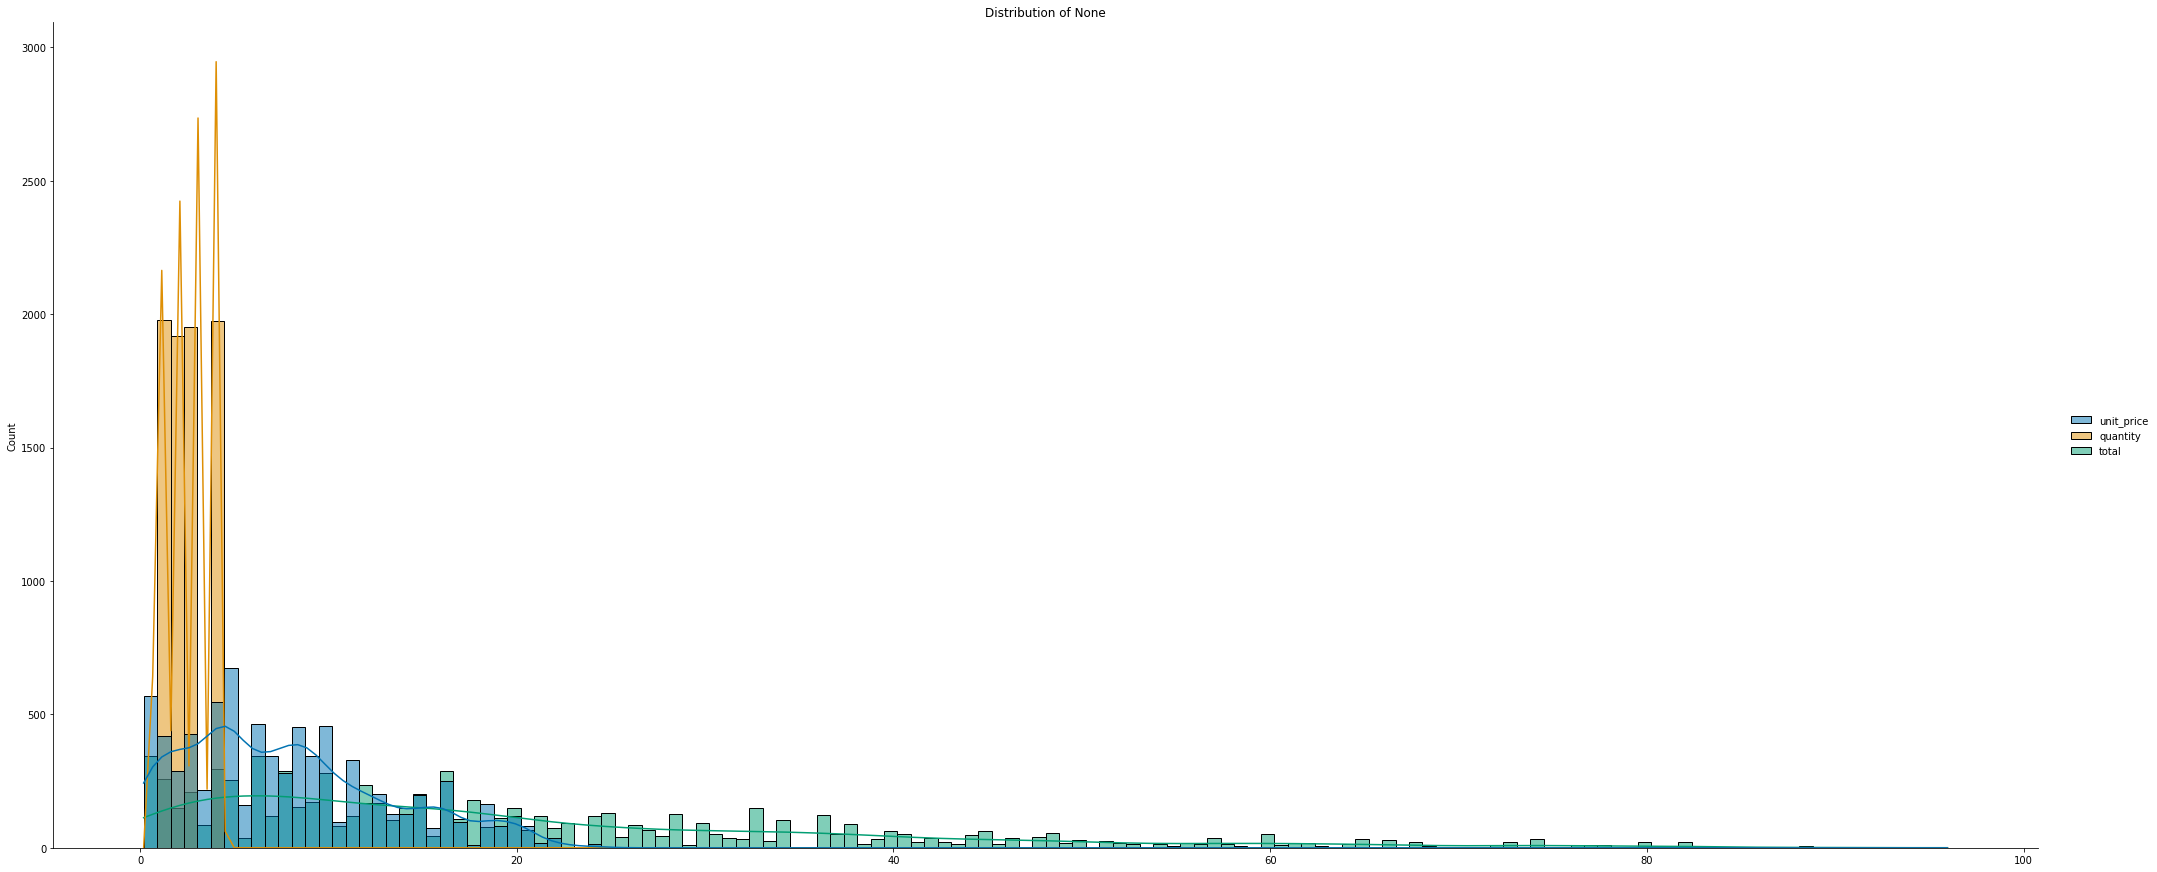

In [16]:
plot_continuous_distribution(df)

This plot confirms what I already knew about the quantity, unit price, and the total obtained from both, when I used `value_counts` earlier.

In [17]:
#Creating a DataFrame of categorical, relaticely low-count columns
df2= df[['category', 'customer_type', 'payment_type']]
df2.head()

,category,customer_type,payment_type
0,fruit,gold,e-wallet
1,fruit,standard,e-wallet
2,fruit,premium,e-wallet
3,fruit,gold,e-wallet
4,fruit,basic,debit card


None
None
None


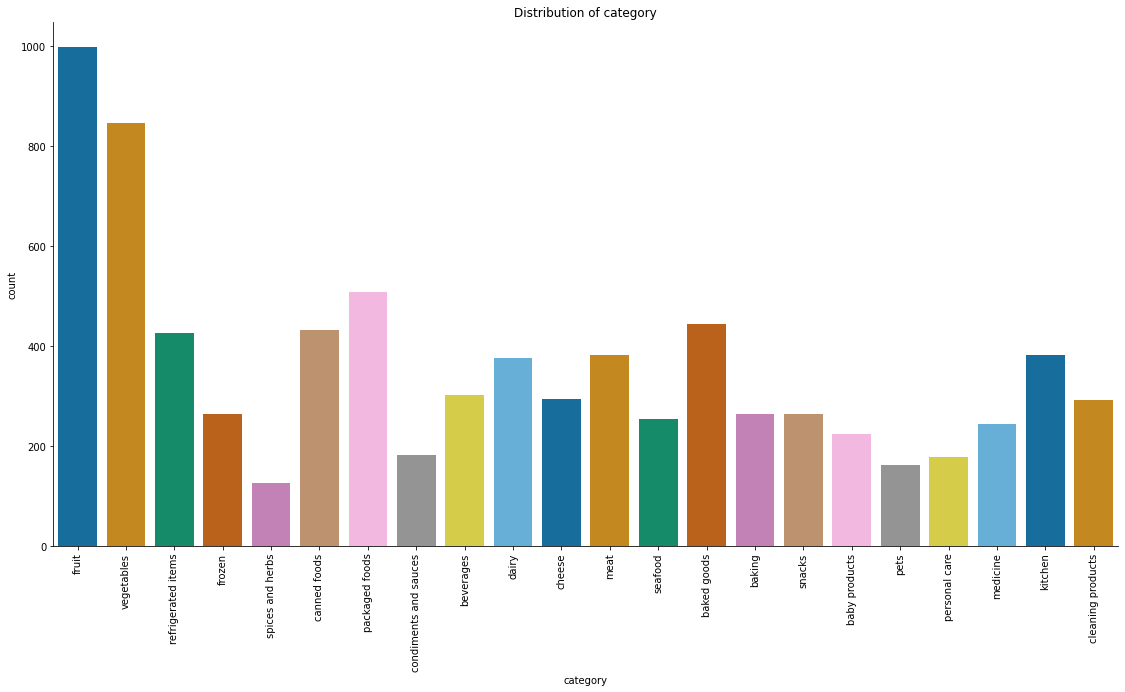

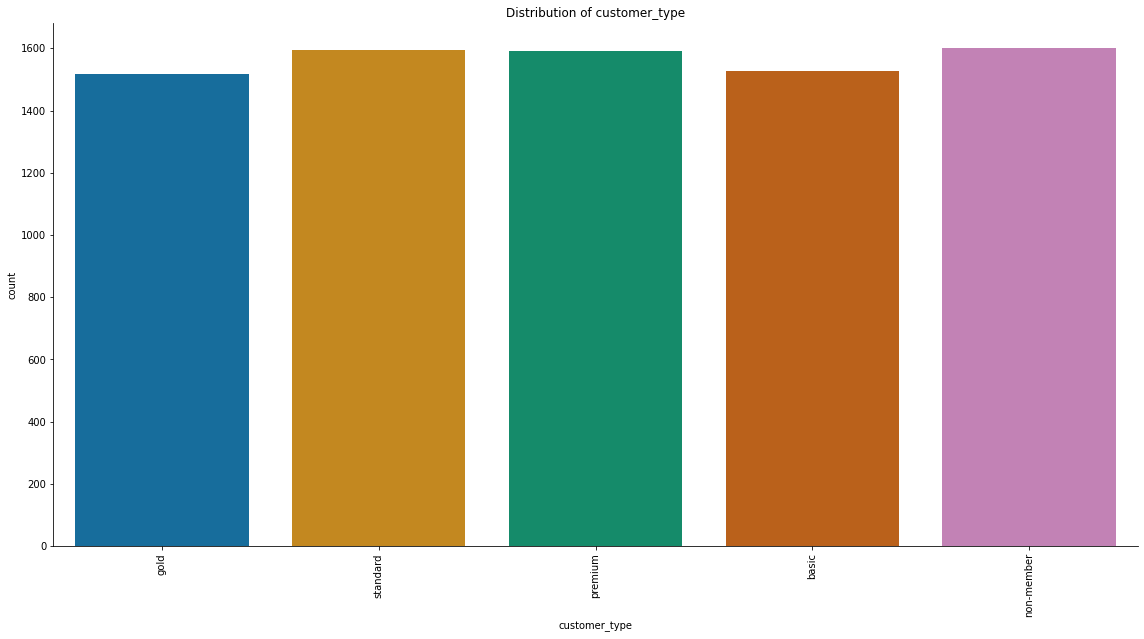

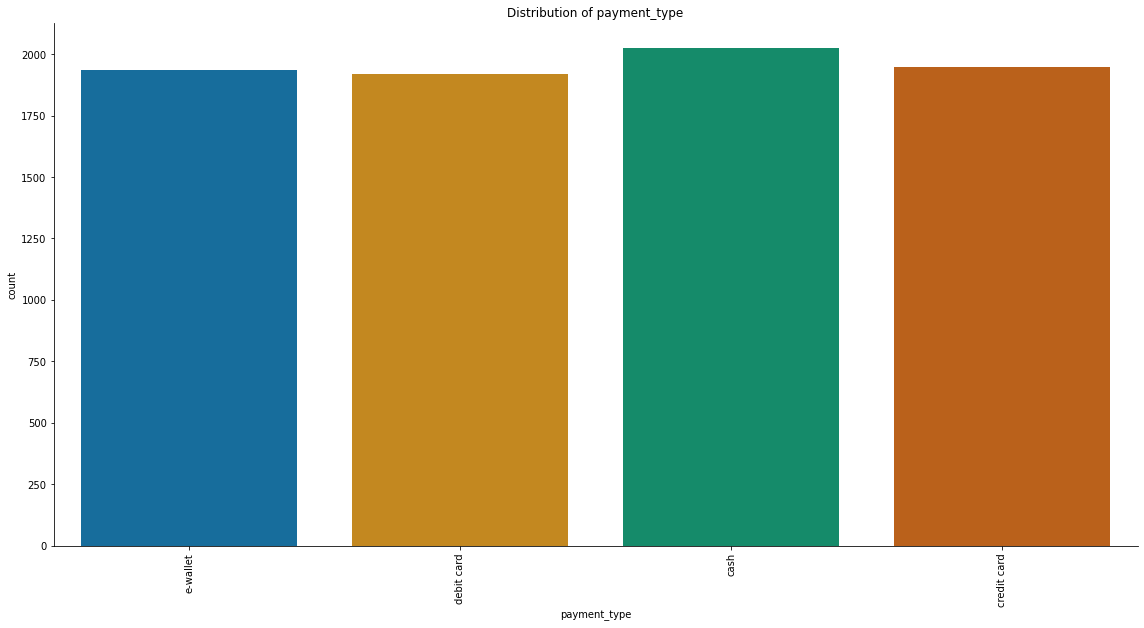

In [18]:
# Plotting those variables
for cat_columns in df2:
    print(plot_categorical_distribution(df, cat_columns))

The category column and the time & transaction_id columns are not well rendered, so I'll use different graph from seaborn to plot them.

I learned that the goods were bought in this rank depending on their quantity

fruit                    0.127475

vegetables               0.108060

packaged foods           0.064759

baked goods              0.056584

canned foods             0.055052

refrigerated items       0.054285 

These are the top 6 items bought in the interval of time we are considering.

There is not a huge gap either between different types of customer and also between payment types although I can notice a slight higher number for customers paying with cash and customers that are not member. 

This could mean that the business may need to motivate customer who do not use eletronic types of payment to do so and incentivise those who do not use memberships to join.

*Because the timestamp column has a lot more granular values, I am running it separately and using a basic sns plot to minimize the time it takes to produce the chart.*

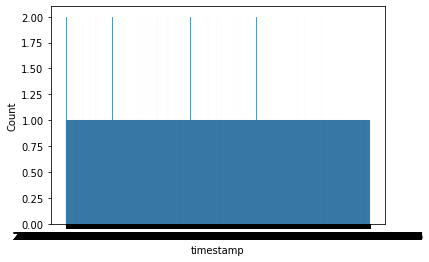

In [19]:
sns.histplot(df, x='timestamp')

In [21]:
# Making the imports to create an autocorrelation plot
import numpy as np

# Visualization imports
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Stats and autocorrelation tools
import statsmodels.api
from statsmodels.tsa.stattools import acf

In [25]:
def create_corr_plot(series, plot_pacf=False):
    '''
    using plotly express to plot an autocorrelation plot
    '''
    corr_array = acf(series.dropna(), alpha=0.05)
    lower_y = corr_array[1][:,0] - corr_array[0]
    upper_y = corr_array[1][:,1] - corr_array[0]

    fig = go.Figure()
    [fig.add_scatter(x=(x,x), y=(0,corr_array[0][x]), mode='lines',line_color='#3f3f3f') 
     for x in range(len(corr_array[0]))]
    fig.add_scatter(x=np.arange(len(corr_array[0])), y=corr_array[0], mode='markers', marker_color='#1f77b4',
                   marker_size=12)
    fig.add_scatter(x=np.arange(len(corr_array[0])), y=upper_y, mode='lines', line_color='rgba(255,255,255,0)')
    fig.add_scatter(x=np.arange(len(corr_array[0])), y=lower_y, mode='lines',fillcolor='rgba(32, 146, 230,0.3)',
            fill='tonexty', line_color='rgba(255,255,255,0)')
    fig.update_traces(showlegend=False)
    fig.update_xaxes(range=[-1,42])
    fig.update_yaxes(zerolinecolor='#000000')
    
    title='Autocorrelation (ACF)'
    fig.update_layout(title=title)
    fig.show()

The histogram of the timestamp column shows me what the value_counts showed. That items bought twice at the same time are the rarest. This tells me that people may be buying things enough to cook and not in bulk.

Checking the DataFrame using df[df['timestamp'] == '2022-03-02 19:32:20'] shows me that the two items baught were not related because it was purchased by two different customers with two different methods of payment, and are two different products. The same goes with all the other products bought at the same time. There are no products bought at the same time 3 of them. This does not help us in finding what needs to be stocled up because most products are bought in a unique manner They may be associated in a different way but not by the time of purchase.

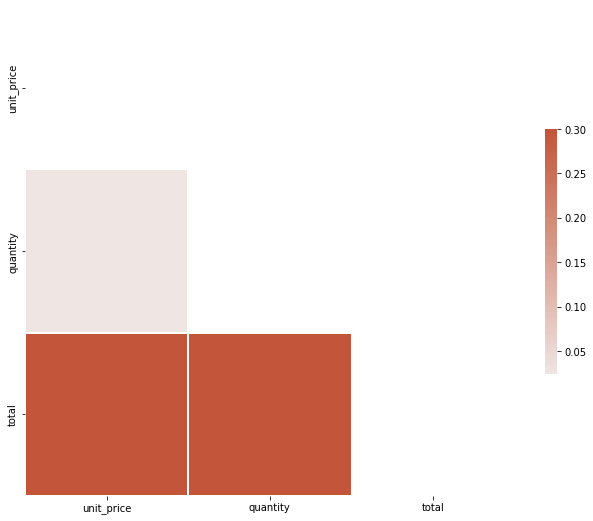

In [24]:
correlation_plot(df)

The correlation heatmap does not show a siginficant amount of information about the correlation between the features in the DataFrame. There is not enough significant features to help find relevant correlation.

In [26]:
create_corr_plot(df.quantity)

This autocorrelation map shows that quantity fluctuates slightly overtime with some sort of pattern but there is not enough data to draw any conclusions

---

## Section 5 - Summary

We have completed an initial exploratory data analysis on the sample of data provided. We should now have a solid understanding of the data. 

The client wants to know

```
"How to better stock the items that they sell"
```

From this dataset, it is impossible to answer that question. In order to make the next step on this project with the client, it is clear that:

- We need more rows of data. The current sample is only from 1 store and 1 week worth of data
- We need to frame the specific problem statement that we want to solve. The current business problem is too broad, we should narrow down the focus in order to deliver a valuable end product
- We need more features. Based on the problem statement that we move forward with, we need more columns (features) that may help us to understand the outcome that we're solving for

